# Lenet architecture

In [13]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
#Rescling the test data
test_datagen= ImageDataGenerator(rescale=1./255)

In [4]:
training_set= train_datagen.flow_from_directory(directory= 'data/train',
                                               target_size=(224,224),
                                               batch_size=8,
                                               class_mode='categorical' 
                                               )

Found 3884 images belonging to 5 classes.


In [5]:


test_set= test_datagen.flow_from_directory(directory= 'data/test',
                                               target_size=(224,224),
                                               batch_size=8,
                                               class_mode='categorical' 
                                          )

Found 1536 images belonging to 5 classes.


In [6]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 120)               5

In [8]:
checkpoint = ModelCheckpoint( filepath='data1/keras_model.h5',monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [9]:
history=model.fit_generator(training_set, #training data to fit
                        steps_per_epoch=len(training_set),
                        epochs=100,
                        validation_data=test_set,
                        validation_steps=len(test_set),
                         callbacks=[checkpoint]
                        )

Epoch 1/5
243/243 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.8182
Epoch 1: val_accuracy improved from -inf to 0.92122, saving model to data1\


INFO:tensorflow:Assets written to: data1\assets


INFO:tensorflow:Assets written to: data1\assets


243/243 [==============================] - 210s 850ms/step - loss: 0.5350 - accuracy: 0.8182 - val_loss: 0.2350 - val_accuracy: 0.9212
Epoch 2/5
243/243 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.9737
Epoch 2: val_accuracy improved from 0.92122 to 0.93620, saving model to data1\


INFO:tensorflow:Assets written to: data1\assets


INFO:tensorflow:Assets written to: data1\assets


243/243 [==============================] - 206s 846ms/step - loss: 0.0906 - accuracy: 0.9737 - val_loss: 0.2143 - val_accuracy: 0.9362
Epoch 3/5
243/243 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9825
Epoch 3: val_accuracy improved from 0.93620 to 0.94271, saving model to data1\


INFO:tensorflow:Assets written to: data1\assets


INFO:tensorflow:Assets written to: data1\assets


243/243 [==============================] - 205s 843ms/step - loss: 0.0530 - accuracy: 0.9825 - val_loss: 0.2264 - val_accuracy: 0.9427
Epoch 4/5
243/243 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9871
Epoch 4: val_accuracy did not improve from 0.94271
243/243 [==============================] - 202s 831ms/step - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.2482 - val_accuracy: 0.9408
Epoch 5/5
243/243 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9907
Epoch 5: val_accuracy improved from 0.94271 to 0.95378, saving model to data1\


INFO:tensorflow:Assets written to: data1\assets


INFO:tensorflow:Assets written to: data1\assets


243/243 [==============================] - 206s 848ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.1971 - val_accuracy: 0.9538


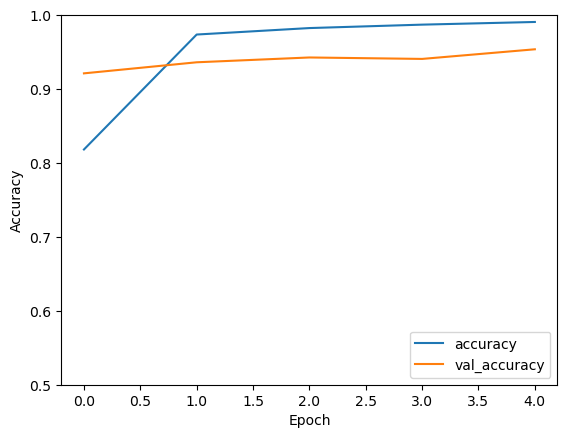

In [14]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')